In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

import image_formats_and_conversions as tools

In [2]:
img = mpimg.imread('cameraman.png')
grayscale_image = rgb2gray(img)

## Two dimensional Fourier Transform

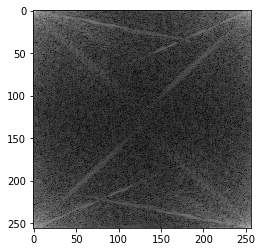

In [3]:
grayscale_image_DFT = np.fft.fft2(grayscale_image)

grayscale_image_DFT_normalized = tools.normalize_fft_image(grayscale_image_DFT)
grayscale_image_DFT_normalized = tools.float_to_uint8(grayscale_image_DFT_normalized)

plt.imshow(grayscale_image_DFT_normalized, cmap="gray")

## Two dimensional inverse Fourier Transform

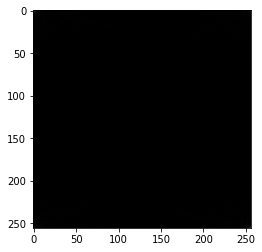

In [4]:
grayscale_image_inverted_DFT = np.fft.ifft2(grayscale_image)

grayscale_image_inverted_DFT_normalized = tools.normalize_fft_image(grayscale_image_inverted_DFT)
grayscale_image_inverted_DFT_normalized = tools.float_to_uint8(grayscale_image_inverted_DFT_normalized)

plt.imshow(grayscale_image_inverted_DFT_normalized, cmap="gray")

## Two dimensional centered Fourier Transform

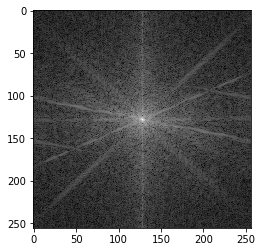

In [5]:
grayscale_image_centered_DFT = np.fft.fftshift(grayscale_image_DFT)

grayscale_image_centered_DFT_normalized = tools.normalize_fft_image(grayscale_image_centered_DFT)
grayscale_image_centered_DFT_normalized = tools.float_to_uint8(grayscale_image_centered_DFT_normalized)

plt.imshow(grayscale_image_centered_DFT_normalized,cmap="gray")

## Ιδεατό Χαμηλοπερατό Φίλτρο
Για να φιλτράρουμε στο πεδίο συχνοτήτων πρέπει να ακολουθήσουμε τα εξής βήματα:
1. Να δημιουργήσουμε μια σφαίρα στο κέντρο της εικόνας με συγκεκριμένη ακτίνα για να κρατήσει συγκεκριμένες συχνότητες.
2. Κάνουμε DFT και μετά DC-DFT στην εικόνα μας.
3. Πολλαπλασιάζουμε την σφαίρα με την DC-DFT εικόνα μας
4. Υπολογίζουμε τον αντίστροφο I-DFT
5. Μετασχηματίζουμε την εικόνα σε εικόνα με απόλυτες τιμές απο 0 έως 1

### 1. Να δημιουργήσουμε μια σφαίρα στο κέντρο της εικόνας με συγκεκριμένη ακτίνα για να κρατήσει συγκεκριμένες συχνότητες.

In [6]:
columns, rows = grayscale_image.shape[:2]

katheta = np.linspace(-127, 128, rows)
orizontia = np.linspace(-127, 128, columns)
orizontia

array([-127., -126., -125., -124., -123., -122., -121., -120., -119.,
       -118., -117., -116., -115., -114., -113., -112., -111., -110.,
       -109., -108., -107., -106., -105., -104., -103., -102., -101.,
       -100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,
        -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,
        -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,
        -73.,  -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,
        -64.,  -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,
        -55.,  -54.,  -53.,  -52.,  -51.,  -50.,  -49.,  -48.,  -47.,
        -46.,  -45.,  -44.,  -43.,  -42.,  -41.,  -40.,  -39.,  -38.,
        -37.,  -36.,  -35.,  -34.,  -33.,  -32.,  -31.,  -30.,  -29.,
        -28.,  -27.,  -26.,  -25.,  -24.,  -23.,  -22.,  -21.,  -20.,
        -19.,  -18.,  -17.,  -16.,  -15.,  -14.,  -13.,  -12.,  -11.,
        -10.,   -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,
         -1.,    0.,

In [7]:
x,y = np.meshgrid(katheta, orizontia)
x,y

(array([[-127., -126., -125., ...,  126.,  127.,  128.],
        [-127., -126., -125., ...,  126.,  127.,  128.],
        [-127., -126., -125., ...,  126.,  127.,  128.],
        ...,
        [-127., -126., -125., ...,  126.,  127.,  128.],
        [-127., -126., -125., ...,  126.,  127.,  128.],
        [-127., -126., -125., ...,  126.,  127.,  128.]]),
 array([[-127., -127., -127., ..., -127., -127., -127.],
        [-126., -126., -126., ..., -126., -126., -126.],
        [-125., -125., -125., ..., -125., -125., -125.],
        ...,
        [ 126.,  126.,  126., ...,  126.,  126.,  126.],
        [ 127.,  127.,  127., ...,  127.,  127.,  127.],
        [ 128.,  128.,  128., ...,  128.,  128.,  128.]]))

In [8]:
apostasi = np.sqrt(np.power(x,2)+np.power(y,2))
apostasi

array([[179.60512242, 178.89941308, 178.19652073, ..., 178.89941308,
        179.60512242, 180.31361568],
       [178.89941308, 178.19090886, 177.48521065, ..., 178.19090886,
        178.89941308, 179.61069011],
       [178.19652073, 177.48521065, 176.7766953 , ..., 177.48521065,
        178.19652073, 178.9105922 ],
       ...,
       [178.89941308, 178.19090886, 177.48521065, ..., 178.19090886,
        178.89941308, 179.61069011],
       [179.60512242, 178.89941308, 178.19652073, ..., 178.89941308,
        179.60512242, 180.31361568],
       [180.31361568, 179.61069011, 178.9105922 , ..., 179.61069011,
        180.31361568, 181.01933598]])

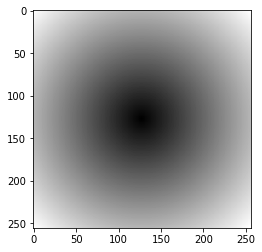

In [21]:
katofli = apostasi < 15
plt.imshow(apostasi, cmap='gray')

### 2. Κάνουμε DFT και μετά DC-DFT στην εικόνα μας.

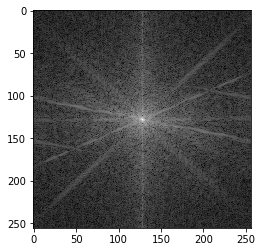

In [22]:
grayscale_image_DFT = np.fft.fft2(grayscale_image)

grayscale_image_centered_DFT = np.fft.fftshift(grayscale_image_DFT)
grayscale_image_centered_DFT_normalized = tools.normalize_fft_image(grayscale_image_centered_DFT)

grayscale_image_centered_DFT_normalized = tools.float_to_uint8(grayscale_image_centered_DFT_normalized)

plt.imshow(grayscale_image_centered_DFT_normalized, cmap='gray')

3. Πολλαπλασιάζουμε την σφαίρα με την DC-DFT εικόνα μας

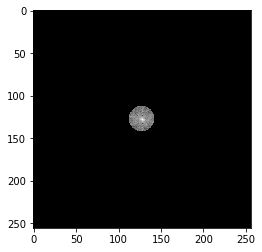

In [23]:
mask_circle = katofli * grayscale_image_centered_DFT
mask_circle_normalized = tools.normalize_fft_image(mask_circle)
mask_circle_final = tools.float_to_uint8(mask_circle_normalized)

plt.imshow(mask_circle_final, cmap='gray')

### 4. Υπολογίζουμε τον αντίστροφο I-DFT

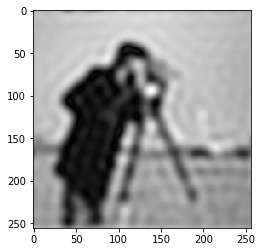

In [24]:
filtered_image = np.fft.ifft2(mask_circle)
grayscale_image_inverted_DFT_normalized = tools.normalize_fft_image(filtered_image)

plt.imshow(grayscale_image_inverted_DFT_normalized, cmap='gray')

### 5. Μετασχηματίζουμε την εικόνα σε εικόνα με απόλυτες τιμές απο 0 έως 1

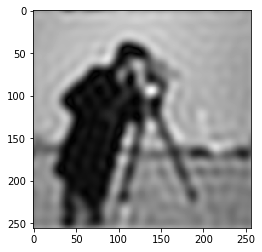

In [25]:
filtered_image_normalized = np.abs(filtered_image)
filtered_image_normalized = tools.float_to_float64(filtered_image_normalized)
plt.imshow(filtered_image_normalized, cmap='gray')

Text(0.5, 1.0, 'Filtered_image')

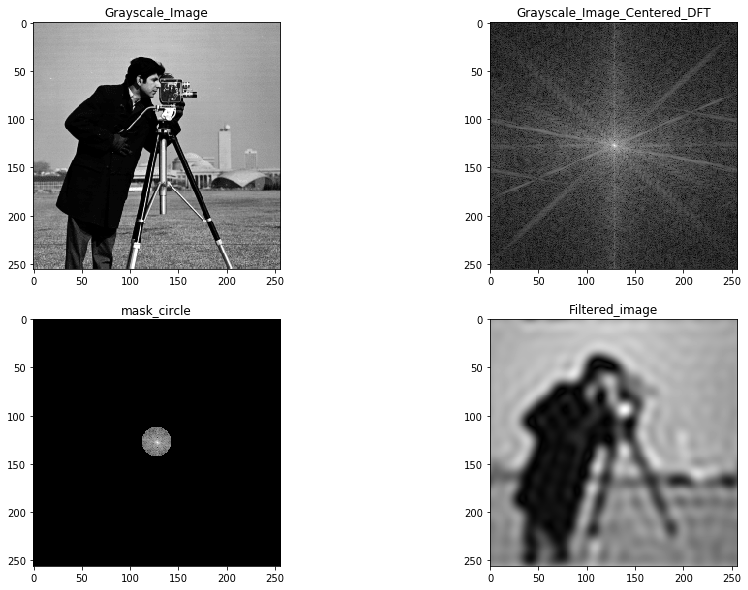

In [26]:
figure1=plt.figure(figsize=(15,10))

subplot1=figure1.add_subplot(2,2,1)
plt.imshow(grayscale_image, cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(2,2,2)
plt.imshow(grayscale_image_centered_DFT_normalized, cmap="gray")
subplot1.set_title('Grayscale_Image_Centered_DFT')

subplot1=figure1.add_subplot(2,2,3)
plt.imshow(mask_circle_normalized, cmap="gray")
subplot1.set_title('mask_circle')

subplot1=figure1.add_subplot(2,2,4)
plt.imshow(filtered_image_normalized, cmap="gray")
subplot1.set_title('Filtered_image')

## Άσκηση
Επαναλάβετε όλη την διαδικασία με την χρήση της εικόνας 'football.jpg' αλλάζοντας το εύρος συχνοτήτων της εικόνας, έτσι ώστε να δημιουργείται περισσότερος θόρυβος. 
#### Μόνο σωστές ασκήσεις θα γίνονται δεκτές!! 